# 自由測試中

## 引用訓練好模型到一張圖片上

In [1]:
import torch

# Model loading
model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # Can be 'yolov5n' - 'yolov5x6', or 'custom'

# Inference on images
img = "000000000009.jpg"  # Can be a file, Path, PIL, OpenCV, numpy, or list of images

# Run inference
results = model(img)

# Display results
results.print() 

Using cache found in C:\Users\USER/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-1-2 Python-3.8.18 torch-2.1.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
image 1/1: 480x640 2 bowls, 2 broccolis, 1 dining table
Speed: 25.0ms pre-process, 122.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


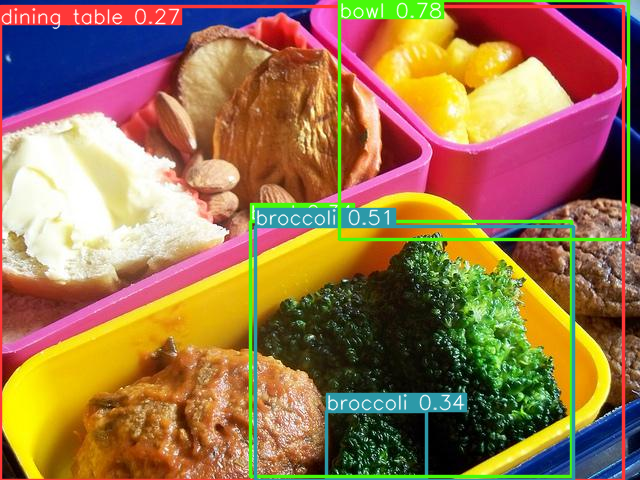

In [2]:
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

## 看自己的配備

In [19]:
!nvidia-smi

Wed Jan 10 13:12:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti   WDDM  | 00000000:3B:00.0  On |                  N/A |
|  0%   44C    P8              16W / 300W |   1102MiB / 11264MiB |     11%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## 使用custom dataset 的範例

In [21]:
import subprocess

command = "python train.py --img 640 --batch 16 --epochs 3 --data coco128mytrial.yaml --weights yolov5s.pt"
process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
stdout, stderr = process.communicate()

print("Output:", stdout.decode())
print("Error:", stderr.decode())

train: weights=yolov5s.pt, cfg=, data=coco128mytrial.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 14 commits. Use 'git pull upstream master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-258-g25a5025 Python-3.8.18 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11264MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

Output: 
Error: train: weights=yolov5s.pt, cfg=, data=coco128mytrial.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 14 commits. Use 'git pull upstream master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-258-g25a5025 Python-3.8.18 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11264MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, 

In [5]:
# Train YOLOv5s on COCO128 for 3 epochs
!python segment/train.py --img 640 --batch 16 --epochs 3 --data coco128-seg.yaml --weights yolov5s-seg.pt --cache  --loggers='tensorboard'

usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE] [--imgsz IMGSZ]
                [--rect] [--resume [RESUME]] [--nosave] [--noval]
                [--noautoanchor] [--noplots] [--evolve [EVOLVE]]
                [--bucket BUCKET] [--cache [CACHE]] [--image-weights]
                [--device DEVICE] [--multi-scale] [--single-cls]
                [--optimizer {SGD,Adam,AdamW}] [--sync-bn] [--workers WORKERS]
                [--project PROJECT] [--name NAME] [--exist-ok] [--quad]
                [--cos-lr] [--label-smoothing LABEL_SMOOTHING]
                [--patience PATIENCE] [--freeze FREEZE [FREEZE ...]]
                [--save-period SAVE_PERIOD] [--seed SEED]
                [--local_rank LOCAL_RANK] [--mask-ratio MASK_RATIO]
                [--no-overlap]
train.py: error: unrecognized arguments: --loggers='tensorboard'


In [8]:
%load_ext tensorboard
%tensorboard --logdir ./runs/train-seg

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [3]:
import tensorflow as tf
import datetime

ModuleNotFoundError: No module named 'wrapt'

# 把Labelme的Json檔案轉換成  YOLOv5的 txt資料

## Bounding box 的2D material 把BULK類別去掉的版本

In [12]:
import os
import json
thing_classes = ["monolayer","multilayer"]
def convert_labelme_to_yolov5(json_dir, output_dir):
    json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

    for json_file in json_files:
        with open(os.path.join(json_dir, json_file)) as f:
            data = json.load(f)

        annotations = data['shapes']
        image_height = data['imageHeight']
        image_width = data['imageWidth']

        txt_file = os.path.join(output_dir, os.path.splitext(json_file)[0] + '.txt')
        with open(txt_file, 'w') as f:
            for annotation in annotations:
                if annotation['label'] == 'bulk':
                    continue  # Skip this annotation
                points = annotation['points']
                label = thing_classes.index(annotation['label'])

                # Calculate bounding box coordinates
                x_min = min(point[0] for point in points) / image_width
                y_min = min(point[1] for point in points) / image_height
                x_max = max(point[0] for point in points) / image_width
                y_max = max(point[1] for point in points) / image_height

                # Convert to YOLO format
                x_center = (x_min + x_max) / 2
                y_center = (y_min + y_max) / 2
                width = x_max - x_min
                height = y_max - y_min

                f.write(f'{label} {x_center} {y_center} {width} {height}\n')

In [13]:
convert_labelme_to_yolov5(r'D:\Yu-ting\research_progress\detectron2-main\detectron2-main\all_data_for_adjust1109\Train', r'D:\Yu-ting\research_progress\yolov5\datasets\2dmaterial\train\label')

## 將以前標記好的圖片資料移動到對應資料夾的code

In [15]:
import shutil
import os

def copy_images(src_dir, dst_dir):
    for filename in os.listdir(src_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # add more conditions if there are other image types
            shutil.copy(os.path.join(src_dir, filename), dst_dir)

# 使用方式
copy_images(r'D:\Yu-ting\research_progress\detectron2-main\detectron2-main\all_data_for_adjust1109\Valid', r'D:\Yu-ting\research_progress\yolov5\datasets\2dmaterial\valid\images')

## 2 label for segmentation

In [16]:
import os
import json
thing_classes = ["monolayer","multilayer"]
def convert_labelme_to_polygon_format(json_dir, output_dir):
    json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

    for json_file in json_files:
        with open(os.path.join(json_dir, json_file)) as f:
            data = json.load(f)

        annotations = data['shapes']
        image_height = data['imageHeight']
        image_width = data['imageWidth']

        txt_file = os.path.join(output_dir, os.path.splitext(json_file)[0] + '.txt')
        with open(txt_file, 'w') as f:
            for annotation in annotations:
                if annotation['label'] == 'bulk':
                    continue  
                points = annotation['points']
                # label = ['mono', 'multi'].index(annotation['label'])  # Update this line
                label = thing_classes.index(annotation['label'])


                # Write label
                f.write(f'{label} ')

                # Write points
                for point in points:
                    x = point[0] / image_width
                    y = point[1] / image_height
                    f.write(f'{x} {y} ')

                f.write('\n')

In [18]:
convert_labelme_to_polygon_format(r'D:\Yu-ting\research_progress\detectron2-main\detectron2-main\all_data_for_adjust1109\Valid', r'D:\Yu-ting\research_progress\yolov5\datasets\2dmaterial-seg\valid\label')

# 開始訓練!!

In [18]:
import comet_ml
comet_ml.init(project_name='2d-material',api_key='hqe0hcASiQIldVXpNoZOPvhNO')



COMET INFO: Valid Comet API Key saved in C:\Users\USER\.comet.config (set COMET_CONFIG to change where it is saved).


In [6]:

comet_ml.init()

COMET ERROR: Invalid Comet API key for https://www.comet.com/clientlib/
Please see https://www.comet.com/docs/command-line/#comet-check for more information.
Use: comet_ml.init() to try again


In [1]:
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

Note: you may need to restart the kernel to use updated packages.


In [35]:
%env COMET_API_KEY=<hqe0hcASiQIldVXpNoZOPvhNO>
%env COMET_PROJECT_NAME=<2d-material>

env: COMET_API_KEY=<hqe0hcASiQIldVXpNoZOPvhNO>
env: COMET_PROJECT_NAME=<2d-material>


## Comet測試

In [1]:
import sys
import torch
import utils
display = utils.notebook_init()

YOLOv5  v7.0-261-g6c03102f Python-3.8.18 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11264MiB)


Setup complete  (64 CPUs, 382.6 GB RAM, 402.2/7079.4 GB disk)


In [2]:
import comet_ml

comet_ml.init(project_name="2d-material")

In [9]:
experiment.end()

In [23]:
%env COMET_MODE=online # Set whether to run Comet in 'online' or 'offline' mode. Defaults to online
%env COMET_LOG_CONFUSION_MATRIX=true # Set to disable logging a Comet Confusion Matrix. Defaults to true
%env COMET_MAX_IMAGE_UPLOADS= 
%env COMET_LOG_PER_CLASS_METRICS=false # Set to log evaluation metrics for each detected class at the end of training. Defaults to false
%env COMET_LOG_PREDICTIONS=true # Set this to false to disable logging model predictions

env: COMET_MODE=online # Set whether to run Comet in 'online' or 'offline' mode. Defaults to online
env: COMET_LOG_CONFUSION_MATRIX=true # Set to disable logging a Comet Confusion Matrix. Defaults to true
env: COMET_MAX_IMAGE_UPLOADS=
env: COMET_LOG_PER_CLASS_METRICS=false # Set to log evaluation metrics for each detected class at the end of training. Defaults to false
env: COMET_LOG_PREDICTIONS=true # Set this to false to disable logging model predictions


In [12]:
experiment = comet_ml.Experiment(
    api_key="hqe0hcASiQIldVXpNoZOPvhNO",
    project_name="2d-material",
)

!python segment/train.py \
--img 640 \
--batch 8 \
--epochs 40 \
--data 2dmaterial-seg.yaml \
--weights yolov5l-seg.pt
experiment.end()

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/airdeliya/2d-material/9c47bf53411448c8ab87797d177320cd

segment\train: weights=yolov5l-seg.pt, cfg=, data=2dmaterial-seg.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=40, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False, entity=None, upload_dataset=Fals

In [27]:
experiment = comet_ml.Experiment(
    api_key="hqe0hcASiQIldVXpNoZOPvhNO",
    project_name="2d-material",
)

!python train.py \
--img 640 \
--batch 8 \
--epochs 40 \
--data 2dmaterial.yaml \
--weights yolov5l.pt\
--upload_dataset
experiment.end()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/airdeliya/2d-material/7e3b732a075b4b448f3fda5f6b17f59f

COMET WARNING: Failed to log system metrics: [sys.ram,sys.cpu,sys.load]
train: weights=yolov5l.pt, cfg=, data=2dmaterial.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=40, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=True, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 22 commits

In [36]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/airdeliya/2d-material/247e39b62ea946ae89961b08d8ef28de
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (69.68 KB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code                  : 1
COMET INFO: 


In [24]:
import sys
!{sys.executable} segment/train.py --img 640 --batch 8 --epochs 50 --data 2dmaterial-seg.yaml --weights yolov5l-seg.pt --cache

segment\train: weights=yolov5l-seg.pt, cfg=, data=2dmaterial-seg.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github:  YOLOv5 is out of date by 22 commits. Use 'git pull upstream master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-260-g45227062 Python-3.8.18 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11264MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

  0%|          | 0/23 [00:00<?, ?it/s]
      25/49      6.74G    0.05263    0.03421    0.02308    0.02393         57        640:   0%|          | 0/23 [00:00<?, ?it/s]
      25/49      6.74G    0.05263    0.03421    0.02308    0.02393         57        640:   4%|▍         | 1/23 [00:00<00:11,  1.96it/s]
      25/49      6.74G    0.05164      0.039    0.02996    0.02304        102        640:   4%|▍         | 1/23 [00:00<00:11,  1.96it/s]
      25/49      6.74G    0.05164      0.039    0.02996    0.02304        102        640:   9%|▊         | 2/23 [00:00<00:09,  2.28it/s]
      25/49      6.74G    0.05293    0.04353    0.03142    0.02332         92        640:   9%|▊         | 2/23 [00:01<00:09,  2.28it/s]
      25/49      6.74G    0.05293    0.04353    0.03142    0.02332         92        640:  13%|█▎        | 3/23 [00:01<00:08,  2.41it/s]
      25/49      6.74G    0.05244    0.04197    0.03254    0.02366        107        640:  13%|█▎        | 3/23 [00:01<00:08,  2.41it/s]
      25/4